In [97]:
import os
import pandas as pd
import geopandas as gpd
import descartes
import numpy as np
import re

import matplotlib.pyplot as plt

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

In [99]:
CLEAN_PATH = '../data/data_clean/us_school_districts.csv'

df = pd.read_csv(CLEAN_PATH)

In [100]:
df_2016 = df[(df.YRDATA == 2016)]
df_2016.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,LOCRTAX,LOCRPROP,LOCREVPAR,PCTTOTAL,PCTFTOT,PCTSTOT,PCTLTOT,TOTALEXP,TCURSPND,TSALWAGE,TEMPBENE,TCURINST,TCURSSVC,PPCSTOT,PPITOTAL,PPSTOTAL
3120,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,6797.0,6775.0,NaN,100.0,9.2,66.6,24.2,76672,74185.0,43030.0,18122.0,43843,23941,7622.0,4563.0,2492.0
3121,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,49106.0,48902.0,NaN,100.0,7.0,42.9,50.1,299880,281647.0,156502.0,61621.0,164977,97231,8942.0,5332.0,3143.0
3122,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,1209.0,1202.0,NaN,100.0,23.2,53.7,23.1,10070,9778.0,5079.0,2064.0,4907,3896,10621.0,5380.0,4272.0
3123,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,2844.0,2836.0,NaN,100.0,13.6,60.7,25.7,29843,25477.0,14015.0,5746.0,15302,7901,8851.0,5384.0,2780.0
3124,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,1716.0,1572.0,NaN,100.0,11.3,67.2,21.5,31662,30616.0,17107.0,7057.0,16407,11087,8931.0,4882.0,3337.0


In [6]:
def n_largest_or_smallest(df, n, operation):
    """Return a sorted df of the n most/least funded districts

        Parameters:
            df (dataframe): the dataframe to be modified
            n (int): the number of districts to keep
            operation (str)['smallest' or 'largest']: whether to return most/least funded 
        Returns:
            new_df (dataframe): A sorted dataframe of the n most/least funded districts in each state
    """
    
    if operation == 'largest':
        new_df = df.groupby(by='STATE')[SCHEMA].apply(lambda x: x.nlargest(n, columns='TOTALREV')) 
    elif operation == 'smallest':
        new_df = df.groupby(by='STATE')[SCHEMA].apply(lambda x: x.nsmallest(n, columns='TOTALREV'))
    else:
        print("operation must be 'largest' or 'smallest'")
        return
    
    return new_df

In [7]:
SCHEMA = ['YRDATA',
'NAME',
'ENROLL',
'TOTALREV',
'TFEDREV',
'TSTREV',
'TLOCREV',
'LOCRTAX',
'LOCRPROP',
#'LOCREVPAR',
'PCTTOTAL',
'PCTFTOT',
'PCTSTOT',
'PCTLTOT',
'TOTALEXP',
'TCURSPND',
'TSALWAGE',
'TEMPBENE',
'TCURINST',
'TCURSSVC',
'PPCSTOT',
'PPITOTAL',
'PPSTOTAL']

least_funded = n_largest_or_smallest(df_2016, 3, 'smallest')
most_funded = n_largest_or_smallest(df_2016, 3, 'largest')

least_funded.head()
most_funded.head()

YRDATA                                       NAME   ENROLL  \
STATE                                                                      
Alabama 3220    2016              MOBILE COUNTY SCHOOL DISTRICT  57581.0   
        3187    2016        JEFFERSON COUNTY BOARD OF EDUCATION  36092.0   
        3121    2016             BALDWIN COUNTY SCHOOL DISTRICT  30931.0   
Alaska  4567    2016                  ANCHORAGE SCHOOL DISTRICT  48324.0   
        4558    2016  MATANUSKA SUSITNA BOROUGH SCHOOL DISTRICT  18742.0   

              TOTALREV  TFEDREV  TSTREV  TLOCREV   LOCRTAX  LOCRPROP  \
STATE                                                                  
Alabama 3220    564939    78217  310545   176177  120352.0   94632.0   
        3187    344274    33131  199350   111793   86396.0   86355.0   
        3121    338236    23710  145180   169346   49106.0   48902.0   
Alaska  4567    758779    78331  463256   217192       0.0       0.0   
        4558    303215    18467  222607    62141       0.0       0.0   

              PCTTOTAL  PCTFTOT  PCTSTOT  PCTLTOT  TOTALEXP  TCURSPND  \
STATE                                                                   
Alabama 3220     100.0     13.8     55.0     31.2    606882  525674.0   
        3187     100.0      9.6     57.9     32.5    338349  321988.0   
        3121     100.0      7.0     42.9     50.1    299880  281647.0   
Alaska  4567     100.0     10.3     61.1     28.6    800058  696207.0   
        4558     100.0      6.1     73.4     20.5    358757  276704.0   

              TSALWAGE  TEMPBENE  TCURINST  TCURSSVC  PPCSTOT  PPITOTAL  \
STATE                                                                     
Alabama 3220  284363.0  119121.0    276941    203328   9037.0    4796.0   
        3187  184880.0   74169.0    179721    112276   8795.0    4980.0   
        3121  156502.0   61621.0    164977     97231   8942.0    5332.0   
Alaska  4567  367144.0  231279.0    411183    263280  14397.0    8509.0   
        4558  138729.0   78139.0    150590    119298  14763.0    8035.0   

              PPSTOTAL  
STATE                   
Alabama 3220    3531.0  
        3187    3111.0  
        3121    3143.0  
Alaska  4567    5448.0  
        4558    6365.0

In [21]:
# df_2016[df_2016.NAME.str.lower().str.contains('ozark', regex=False)]

In [101]:
map_2016 = gpd.read_file('../data/data_clean/unsd_map/unsd_compiled.shp')

In [102]:
map_2016.head()

,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,00001,0100001,Fort Rucker School District,00,KG,12,G5420,B,E,233059995,2735224,+31.4097368,-085.7458071,"POLYGON ((-85.86572 31.45470, -85.86543 31.454..."
1,01,00003,0100003,Maxwell AFB School District,00,KG,12,G5420,B,E,8476761,566857,+32.3809438,-086.3637490,"POLYGON ((-86.37655 32.39358, -86.37621 32.393..."
2,01,00005,0100005,Albertville City School District,00,KG,12,G5420,None,E,68731806,258708,+34.2631303,-086.2106600,"MULTIPOLYGON (((-86.25104 34.25266, -86.25060 ..."
3,01,00006,0100006,Marshall County School District,00,PK,12,G5420,None,E,1267142967,103647100,+34.3739971,-086.3442702,"MULTIPOLYGON (((-86.10870 34.19063, -86.10873 ..."
4,01,00007,0100007,Hoover City School District,00,KG,12,G5420,None,E,121693900,2594832,+33.3769487,-086.8055789,"MULTIPOLYGON (((-86.66393 33.40902, -86.66333 ..."


In [103]:
finances_2016 = df_2016
finances_2016.NAME = finances_2016.NAME.str.lower()

my_map = {'schs': 'school district',
         'sch': 'school',
         'dist': 'district',
         'dst': 'district',
         'isd': 'school district',
         'pub': 'public',
         'ex': 'exempted',
         'vlg': 'village',
         'community': 'county',
         'comm': 'county',
         'com': 'county',
         'co': 'county',
         'inc': 'corporation',
         'ind': 'independent',
         'uni': 'unified',
         'unif': 'unified',
         'uf': 'union free',
         'hts': 'heights',
         'supv': 'supervisory',
         'twp': 'township',
         'cty': 'city',
         'ctl': 'central',
         'elem': 'elementary'}

drop_map = {'public': '',
            'school': '',
            'schools': '',
            'district': '',
            'merged': '',
            'cusd': '',
            'usd': '',
            'reg': '',
            'jt': '',
            #'r': '',
            'voc': '' }

#####
# r-X, r X, 
#####
my_map = {rf'\b{i}\b': word for i, word in my_map.items()}
drop_map = {rf'\b{i}\b': word for i, word in drop_map.items()}

finances_2016.NAME = finances_2016.NAME.replace(my_map, regex=True)
finances_2016.NAME = finances_2016.NAME.replace(drop_map, regex=True)

# removes 'r-' and ' r ' from district code
finances_2016.NAME = finances_2016.NAME.str.replace(rf" r-", '', regex=True)
finances_2016.NAME = finances_2016.NAME.str.replace(rf" r ", '', regex=True)

#removes {0-9}-{0-9} zones - redundant
# sd = sd.str.replace("[0-9]+\-[0-9]+", '', regex=True)

#some districts ended with a period before zone number
finances_2016.NAME = finances_2016.NAME.str.replace('.', '', regex=False)

#remove '#' symbol but keep these numbers
finances_2016.NAME = finances_2016.NAME.str.replace('#', '')

#some districts had sub-zone in parenthesis - redundant
finances_2016.NAME = finances_2016.NAME.str.replace("\([^()]*\)", '', regex=True)

#sd = sd.str.contains('independent').replace(rf"\d+", '', regex=True)

finances_2016.NAME = finances_2016.NAME.str.rstrip()
finances_2016.NAME = finances_2016.NAME.str.replace("\s+", ' ', regex=True)
# finances_2016.NAME = finances_2016.NAME.sort_values()

finances_2016.head(100)


,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,LOCRTAX,LOCRPROP,LOCREVPAR,PCTTOTAL,PCTFTOT,PCTSTOT,PCTLTOT,TOTALEXP,TCURSPND,TSALWAGE,TEMPBENE,TCURINST,TCURSSVC,PPCSTOT,PPITOTAL,PPSTOTAL
3120,Alabama,9609.0,autauga county,2016,80867,7447,53842,19578,6797.0,6775.0,NaN,100.0,9.2,66.6,24.2,76672,74185.0,43030.0,18122.0,43843,23941,7622.0,4563.0,2492.0
3121,Alabama,30931.0,baldwin county,2016,338236,23710,145180,169346,49106.0,48902.0,NaN,100.0,7.0,42.9,50.1,299880,281647.0,156502.0,61621.0,164977,97231,8942.0,5332.0,3143.0
3122,Alabama,912.0,barbour county,2016,10116,2342,5434,2340,1209.0,1202.0,NaN,100.0,23.2,53.7,23.1,10070,9778.0,5079.0,2064.0,4907,3896,10621.0,5380.0,4272.0
3123,Alabama,2842.0,eufaula city,2016,26182,3558,15900,6724,2844.0,2836.0,NaN,100.0,13.6,60.7,25.7,29843,25477.0,14015.0,5746.0,15302,7901,8851.0,5384.0,2780.0
3124,Alabama,3322.0,bibb county,2016,32486,3664,21846,6976,1716.0,1572.0,NaN,100.0,11.3,67.2,21.5,31662,30616.0,17107.0,7057.0,16407,11087,8931.0,4882.0,3337.0
3125,Alabama,7870.0,blount county,2016,69966,6929,48563,14474,3516.0,3497.0,NaN,100.0,9.9,69.4,20.7,68297,65604.0,36546.0,15474.0,37442,22662,8192.0,4758.0,2880.0
3126,Alabama,1477.0,oneonta city,2016,13464,992,8541,3931,1099.0,1098.0,NaN,100.0,7.4,63.4,29.2,12726,12298.0,6479.0,2585.0,6999,3758,7884.0,4739.0,2544.0
3127,Alabama,1505.0,bullock county,2016,14876,3061,9273,2542,1517.0,1500.0,NaN,100.0,20.6,62.3,17.1,14713,14544.0,8111.0,3339.0,6996,6006,9556.0,4649.0,3991.0
3128,Alabama,3135.0,butler county,2016,32062,6439,18770,6853,2770.0,2760.0,NaN,100.0,20.1,58.5,21.4,31393,29564.0,16760.0,6707.0,16091,10523,9213.0,5130.0,3357.0
3129,Alabama,2099.0,anniston city,2016,23776,4344,11810,7622,4722.0,4711.0,NaN,100.0,18.3,49.7,32.1,24320,23883.0,12018.0,4843.0,12649,9344,11277.0,6026.0,4452.0


In [108]:
map_2016.NAME = map_2016.NAME.str.lower()

map_2016.NAME = map_2016.NAME.replace(my_map, regex=True)
map_2016.NAME = map_2016.NAME.replace(drop_map, regex=True)

# #(ix|iv|v?i{0,3})
map_2016.NAME = map_2016.NAME.str.replace(rf" r-", ' ', regex=True)


map_2016.NAME = map_2016.NAME.str.rstrip()
map_2016.NAME = map_2016.NAME.str.replace("\s+", ' ', regex=True)

map_2016.head()

,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,00001,0100001,fort rucker,00,KG,12,G5420,B,E,233059995,2735224,+31.4097368,-085.7458071,"POLYGON ((-85.86572 31.45470, -85.86543 31.454..."
1,01,00003,0100003,maxwell afb,00,KG,12,G5420,B,E,8476761,566857,+32.3809438,-086.3637490,"POLYGON ((-86.37655 32.39358, -86.37621 32.393..."
2,01,00005,0100005,albertville city,00,KG,12,G5420,None,E,68731806,258708,+34.2631303,-086.2106600,"MULTIPOLYGON (((-86.25104 34.25266, -86.25060 ..."
3,01,00006,0100006,marshall county,00,PK,12,G5420,None,E,1267142967,103647100,+34.3739971,-086.3442702,"MULTIPOLYGON (((-86.10870 34.19063, -86.10873 ..."
4,01,00007,0100007,hoover city,00,KG,12,G5420,None,E,121693900,2594832,+33.3769487,-086.8055789,"MULTIPOLYGON (((-86.66393 33.40902, -86.66333 ..."


In [124]:
count = 0
duplicate = 0
not_matched = []
matched = []

for district in finances_2016.NAME:
    print("{} --- {}".format(district, map_2016.NAME[map_2016.NAME == district]))
    
#     tmp = map_sd.str.match(district).any()

#     if tmp == 0:
#         not_matched.append(district)
#     else:
#         matched.append(district)
#         count += 1

# print(count)
# print(count / len(sd))

autauga county --- 21    autauga county
Name: NAME, dtype: object
baldwin county --- 22      baldwin county
1251    baldwin county
3589    baldwin county
Name: NAME, dtype: object
barbour county --- 23       barbour county
10419    barbour county
Name: NAME, dtype: object
eufaula city --- 59    eufaula city
Name: NAME, dtype: object
bibb county --- 25      bibb county
1257    bibb county
Name: NAME, dtype: object
blount county --- 27      blount county
8759    blount county
Name: NAME, dtype: object
oneonta city --- 100     oneonta city
6266    oneonta city
Name: NAME, dtype: object
bullock county --- 29    bullock county
Name: NAME, dtype: object
butler county --- 30      butler county
2864    butler county
Name: NAME, dtype: object
anniston city --- 11    anniston city
Name: NAME, dtype: object
calhoun county --- 31       calhoun county
1183     calhoun county
1268     calhoun county
4414     calhoun county
8530     calhoun county
10425    calhoun county
Name: NAME, dtype: object
jac

Name: NAME, dtype: object
randolph county --- 111      randolph county
1381     randolph county
6580     randolph county
10460    randolph county
Name: NAME, dtype: object
roanoke city --- 112      roanoke city
10096    roanoke city
Name: NAME, dtype: object
phenix city --- Series([], Name: NAME, dtype: object)
russell county --- 113      russell county
2984     russell county
10100    russell county
Name: NAME, dtype: object
st clair county --- Series([], Name: NAME, dtype: object)
pell city --- Series([], Name: NAME, dtype: object)
shelby county --- 118     shelby county
2987    shelby county
8750    shelby county
Name: NAME, dtype: object
sumter county --- 120     sumter county
1236    sumter county
1391    sumter county
Name: NAME, dtype: object
sylacauga city --- 121    sylacauga city
Name: NAME, dtype: object
talladega city --- 122    talladega city
Name: NAME, dtype: object
talladega county --- 123    talladega county
Name: NAME, dtype: object
tallapoosa county --- 124    tallap

whiteriver unified 20 --- Series([], Name: NAME, dtype: object)
winslow unified 1 --- Series([], Name: NAME, dtype: object)
northern arizona vocational institute of technology --- Series([], Name: NAME, dtype: object)
northeast arizona technological institute of vocational educatio --- Series([], Name: NAME, dtype: object)
pinon unified 4 --- Series([], Name: NAME, dtype: object)
heber overgaard --- Series([], Name: NAME, dtype: object)
ajo 15 and 103 --- Series([], Name: NAME, dtype: object)
amphitheater 10 --- Series([], Name: NAME, dtype: object)
catalina foothills 16 --- Series([], Name: NAME, dtype: object)
continental 39 --- Series([], Name: NAME, dtype: object)
empire 37 --- Series([], Name: NAME, dtype: object)
flowing wells 8 --- Series([], Name: NAME, dtype: object)
indian oasis-baboquivara unified 40 --- Series([], Name: NAME, dtype: object)
marana unified 6 --- Series([], Name: NAME, dtype: object)
redington 44 --- Series([], Name: NAME, dtype: object)
sahuarita 30 --- Seri

southside --- 499      southside
10360    southside
Name: NAME, dtype: object
calico rock --- 355    calico rock
Name: NAME, dtype: object
melbourne --- 456    melbourne
Name: NAME, dtype: object
izard county consolidated --- Series([], Name: NAME, dtype: object)
northcentral arkansas educal serv center --- Series([], Name: NAME, dtype: object)
newport --- 299      newport
5369     newport
8268     newport
8498     newport
10280    newport
Name: NAME, dtype: object
jackson county --- 77       jackson county
507      jackson county
1208     jackson county
1337     jackson county
2922     jackson county
4454     jackson county
6549     jackson county
8805     jackson county
10436    jackson county
Name: NAME, dtype: object
dollarway 2 --- Series([], Name: NAME, dtype: object)
pine bluff 3 --- Series([], Name: NAME, dtype: object)
watson chapel 24 --- Series([], Name: NAME, dtype: object)
white hall 27 --- Series([], Name: NAME, dtype: object)
arkansas river educ serv coop --- Series([], 

Name: NAME, dtype: object
pleasanton unified --- 533    pleasanton unified
Name: NAME, dtype: object
san leandro unified --- 801    san leandro unified
Name: NAME, dtype: object
san lorenzo unified --- 802    san lorenzo unified
Name: NAME, dtype: object
sunol glen elementary --- Series([], Name: NAME, dtype: object)
tri-valley rop jpa --- Series([], Name: NAME, dtype: object)
eden area rop jpa --- Series([], Name: NAME, dtype: object)
mission valley roc/p jpa --- Series([], Name: NAME, dtype: object)
dublin unified --- 532    dublin unified
Name: NAME, dtype: object
fremont unified --- 677    fremont unified
Name: NAME, dtype: object
new haven unified --- 748    new haven unified
Name: NAME, dtype: object
livermore valley unified --- Series([], Name: NAME, dtype: object)
alpine county unified --- 591    alpine county unified
Name: NAME, dtype: object
amador county unified --- 593    amador county unified
Name: NAME, dtype: object
bangor union elementary --- Series([], Name: NAME, dtyp

alhambra unified --- 571    alhambra unified
Name: NAME, dtype: object
antelope valley union high --- Series([], Name: NAME, dtype: object)
arcadia unified --- 596    arcadia unified
Name: NAME, dtype: object
azusa unified --- 598    azusa unified
Name: NAME, dtype: object
baldwin park unified --- 600    baldwin park unified
Name: NAME, dtype: object
bassett unified --- 603    bassett unified
Name: NAME, dtype: object
bellflower unified --- 606    bellflower unified
Name: NAME, dtype: object
beverly hills unified --- 609    beverly hills unified
Name: NAME, dtype: object
bonita unified --- 614    bonita unified
Name: NAME, dtype: object
burbank unified --- 617    burbank unified
Name: NAME, dtype: object
castaic union --- Series([], Name: NAME, dtype: object)
centinela valley union high --- Series([], Name: NAME, dtype: object)
charter oak unified --- 632    charter oak unified
Name: NAME, dtype: object
claremont unified --- 635    claremont unified
Name: NAME, dtype: object
compton un

tahoe truckee unified --- Series([], Name: NAME, dtype: object)
mid-placer transportation jpa --- Series([], Name: NAME, dtype: object)
southern placer transportation authority --- Series([], Name: NAME, dtype: object)
plumas unified --- 776    plumas unified
Name: NAME, dtype: object
alvord unified --- 592    alvord unified
Name: NAME, dtype: object
banning unified --- 601    banning unified
Name: NAME, dtype: object
beaumont unified --- 605    beaumont unified
Name: NAME, dtype: object
coachella valley unified --- 638    coachella valley unified
Name: NAME, dtype: object
corona norco unified --- Series([], Name: NAME, dtype: object)
desert ctr unified --- Series([], Name: NAME, dtype: object)
lake elsinore unified --- 538    lake elsinore unified
Name: NAME, dtype: object
hemet unified --- 688    hemet unified
Name: NAME, dtype: object
desert sands unified --- 657    desert sands unified
Name: NAME, dtype: object
menifee union elementary --- Series([], Name: NAME, dtype: object)
murr

spencer val elementary --- Series([], Name: NAME, dtype: object)
sweetwater union high --- Series([], Name: NAME, dtype: object)
vallecitos elementary --- Series([], Name: NAME, dtype: object)
vista unified --- 847    vista unified
Name: NAME, dtype: object
warner unified --- 551    warner unified
Name: NAME, dtype: object
valley center-pauma unified --- 569    valley center-pauma unified
Name: NAME, dtype: object
san francisco unified --- 796    san francisco unified
Name: NAME, dtype: object
san francisco city/cnty special --- Series([], Name: NAME, dtype: object)
banta elementary --- Series([], Name: NAME, dtype: object)
escalon unified --- 667    escalon unified
Name: NAME, dtype: object
jefferson elementary --- Series([], Name: NAME, dtype: object)
lammersville joint unified --- 579    lammersville joint unified
Name: NAME, dtype: object
lincoln unified --- 707    lincoln unified
Name: NAME, dtype: object
linden unified --- 708    linden unified
Name: NAME, dtype: object
lodi unif

KeyboardInterrupt: 

In [10]:
print(count)
print(count / len(sd))

print(len(sd))
print(len(map_sd))
print(len(map_sd) / len(sd))

14325
10896
0.7606282722513089


In [19]:
 for town in not_matched:
        print(town)

 50
 admin 1
 admin 10
 admin 11
 admin 12
 admin 13
 admin 15
 admin 17
 admin 19
 admin 20
 admin 23
 admin 24
 admin 27
 admin 28
 admin 29
 admin 3
 admin 30
 admin 31
 admin 32
 admin 33
 admin 37
 admin 4
 admin 40
 admin 41
 admin 42
 admin 44
 admin 46
 admin 49
 admin 51
 admin 52
 admin 53
 admin 54
 admin 55
 admin 57
 admin 58
 admin 59
 admin 6
 admin 60
 admin 61
 admin 63
 admin 64
 admin 65
 admin 7
 admin 70
 admin 72
 admin 74
 admin 75
 admin 76
 admin 8
 association special education dupage
 city of east chicago
 d anderson area vocational center
 o w v a county unit 208
 of the osage 2
a e o special education cooperative
a w beattie career center
abbott independent 901
aberdeen 6-1
abernathy independent 901
abilene independent 901
abingdon - avon 276
abington town
absarokee elementary 52-c
absarokee h s 52
academy independent 901
acalanes union high
acgc
achievement
achille 3
ackerman elementary
acton department
acushnet town
ada 19
ada-borup 2854
adair 2
adair cou

kearsley county 14
keene independent 906
keeneyville 20
kell consolidated 2
keller 3
keller independent 907
kelliher 36
kellogg 391
kelloggsville 8f
kellyville 31
kelso 458
kelso c 7
kelton independent 905
kemp independent 904
kendall county special education cooperative
kenedy county wide common 901
kenedy independent 902
kenesaw 3
kenilworth 38
kennard independent 906
kennebec intra- rsu 02
kennebec valley consolidated
kennedale independent 914
kennewick 17
kenosha unified 1
kensal spec 19
kensington town
kent 415
kent intermediate
kent town
kentfield elementary
kenwood
kenwood 30
kenyon-wanamingo 2172
keota 43
keppel union elementary
kerens independent 907
kerkhoven-murdock-sunburg 775
kermit independent 901
kern county spl oper by county supt
kern high
kernville union elementary
kerrville independent 903
keshequa central
kester elementary 23
ketchikan-gateway borough
ketchum 6
kettle falls 212
keya paha high 100
keyes 11
keyes union elementary
keys 6
keystone 15
keytesville 3
kidde

st george town
st helena parish
st helena unified
st helens 502
st henry local
st ignace
st ignatius k-12
st james 1
st james 840
st james parish
st john 3
st john 322
st john parish
st john-hudson unified 350
st johns
st johns county
st johns unified 1
st johnsbury town
st joseph
st joseph city
st joseph county consolidated 169
st joseph intermediate
st joseph ogden county high 305
st landry parish
st libory consolidated 30
st louis city 9
st louis city bd of education
st louis county 2142
st louis county special dt
st louis park independent 283
st lucie county
st maries 41
st martin parish
st mary parish
st marys
st marys area
st marys city
st marys county
st michael-albertville 885
st paul 45
st paul city 1
st paul independent 625
st peter independent 508
st regis falls centl
st regis k-12
st rose 14 15
st tammany parish
st thomas special 43
st vrain valley re-1j
stafford munc 910
stafford town
stafford township
stamford city
stamford independent 906
stamford town
standard
stanfield

In [128]:
town = 'montgomery county'

print("FINANCES")
print('='*10)
print(finances_2016[finances_2016.NAME.str.lower().str.contains(town, regex=False)])
print('='*50)
print("MAP")
print('='*10)
print(map_2016[map_2016.NAME.str.lower().str.contains(town, regex=False)])
print('='*50)
# print('NOT MATCHED FROM FINANCES')
# print('='*10)
# for i in not_matched:
#     if town in i:
#         print(i)


FINANCES
                 STATE    ENROLL                                    NAME  \
3225           Alabama   30667.0                       montgomery county   
59400          Georgia    1410.0                       montgomery county   
95189          Indiana    1949.0     north montgomery county corporation   
95190          Indiana    1812.0     south montgomery county corporation   
116466        Kentucky    4890.0                       montgomery county   
125782        Maryland  156380.0                       montgomery county   
166658     Mississippi     273.0                       montgomery county   
179641        Missouri    1261.0                    montgomery county r2   
245051  North Carolina    4134.0                       montgomery county   
303170    Pennsylvania       0.0  montgomery county intermediate unit 23   
314077       Tennessee   32605.0                       montgomery county   
353197        Virginia    9775.0                       montgomery county   

  

In [13]:
for district in matched:
    print("{}, {}".format(district, map_sd[map_sd.str.match(district)].to_string(index=False)))

 administrative 14,   administrative 14
 administrative 35,   administrative 35
 administrative 45,   administrative 45
 of columbia,   of columbia
 u-46,   u-46
a-h-s-t,  a-h-s-t county
abbeville county,  abbeville county
abbotsford,  abbotsford
abc unified,  abc unified
aberdeen,       aberdeen
      aberdeen
 aberdeen 06-1
   aberdeen 58
aberdeen 5,  aberdeen 58
aberdeen 58,  aberdeen 58
abilene unified 435,  abilene unified 435
abington,          abington
         abington
 abington heights
abington heights,  abington heights
absecon,  absecon city
academy 20,  academy 20
acadia parish,  acadia parish
accomack county,  accomack county
acton-agua dulce unified,  acton-agua dulce unified
acton-boxborough,  acton-boxborough regional
ada exempted,  ada exempted village
adair county,      adair county
  adair county -i
 adair county -ii
adair-casey county,  adair-casey county
adams central county,  adams central county
adams county/ohio valley local,  adams county/ohio valley local
adam

armstrong,  armstrong
arock 81,  arock 81
artesia,  artesia
arthur county unit 305,  arthur county unit 305
asbury park,  asbury park city
ascension parish,  ascension parish
ashe county,  ashe county
asheboro city,  asheboro city
asheville city,  asheville city
ashland,              ashland
             ashland
           ashland 5
        ashland city
 ashland independent
 ashland unified 220
   ashland-greenwood
ashland,              ashland
             ashland
           ashland 5
        ashland city
 ashland independent
 ashland unified 220
   ashland-greenwood
ashland 5,  ashland 5
ashland city,  ashland city
ashland indep,  ashland independent
ashland unified 220,  ashland unified 220
ashley 9,  ashley 9
ashley county,  ashley county
ashtabula area city,  ashtabula area city
ashton county unit 275,  ashton county unit 275
ashwaubenon,  ashwaubenon
ashwood 8,  ashwood 8
aspen 1,  aspen 1
assumption parish,  assumption parish
astoria county unit 1,  astoria county unit 1
atascad

belchertown,  belchertown
belcourt 7,  belcourt 7
belding area,  belding area
belen,  belen consolidated
belfast central,  belfast central
belfield 13,  belfield 13
belfry k-12,  belfry k-12
belgrade-brooten-elrosa,  belgrade-brooten-elrosa
bell county,  bell county
bellaire,        bellaire
 bellaire local
belle plaine county,  belle plaine county
belle plaine unified 357,  belle plaine unified 357
belle vernon area,  belle vernon area
bellefontaine city,  bellefontaine city
bellefonte area,  bellefonte area
belleville,                    belleville
 belleville henderson central
              belleville town
belleville henderson central,  belleville henderson central
belleville town,  belleville town
bellevue city,  bellevue city
bellevue county,  bellevue county
 bellevue county
bellevue county,  bellevue county
 bellevue county
bellevue indep,  bellevue independent
 bellevue independent
bellflower unified,  bellflower unified
belmar boro,  belmar borough
belmond-klemme,  belmond-kle

branchburg township,  branchburg township
brandon,              brandon
 brandon valley 49-2
  brandon-evansville
brandon valley 49-2,  brandon valley 49-2
brandon-evansville,  brandon-evansville
brandywine,               brandywine
       brandywine county
 brandywine heights area
brandywine,               brandywine
       brandywine county
 brandywine heights area
brandywine heights area,  brandywine heights area
brantley county,  brantley county
brasher falls central,  brasher falls central
braxton county,  braxton county
breathitt county,  breathitt county
breckenridge county,  breckenridge county
breckinridge county,  breckinridge county
brecksville-broadview heights,  brecksville-broadview heights city
bremen,       bremen
 bremen city
bremen city,  bremen city
brentwood,             brentwood
    brentwood borough
 brentwood union free
brentwood,             brentwood
    brentwood borough
 brentwood union free
brentwood boro,  brentwood borough
brentwood union free,  brentwood

 calumet
calvert county,  calvert county
camanche county,  camanche county
camas county 121,  camas county 121
camas valley 21,  camas valley 21j
cambria heights,  cambria heights
cambria-friesland,  cambria-friesland
cambridge,                  cambridge
                 cambridge
                 cambridge
         cambridge central
            cambridge city
 cambridge county unit 227
       cambridge joint 432
          cambridge-isanti
cambridge,                  cambridge
                 cambridge
                 cambridge
         cambridge central
            cambridge city
 cambridge county unit 227
       cambridge joint 432
          cambridge-isanti
cambridge central,  cambridge central
cambridge city,  cambridge city
cambridge city,  cambridge city
cambridge county unit 227,  cambridge county unit 227
camden central,  camden central
camden city,  camden city
camden county,  camden county
 camden county
camden county,  camden county
 camden county
cameron county,  cameron

central 13j,  central 13j
central a & m county unit 21,  central a & m county unit 21
central bucks,  central bucks
central cambria,  central cambria
central cass 17,  central cass 17
central city county,  central city county
central columbia,  central columbia
central consolidated,  central consolidated
central county,           central county
          central county
 central county unit 301
   central county unit 4
central county,           central county
          central county
 central county unit 301
   central county unit 4
central county unit 3,  central county unit 301
central county unit 301,  central county unit 301
central county unit 4,  central county unit 4
central curry 1,  central curry 1
central dauphin,  central dauphin
central decatur county,  central decatur county
central falls,  central falls
central fulton,  central fulton
central greene,  central greene
central heights unified 288,  central heights unified 288
central high,  central high
central islip union fr

clarkstown central,  clarkstown central
clarksville,                           clarksville
                          clarksville
                   clarksville county
       clarksville county corporation
              clarksville independent
 clarksville-montgomery county system
clarksville county,              clarksville county
 clarksville county corporation
clarksville county corporation,  clarksville county corporation
clatskanie 6j,  clatskanie 6j
clay center unified 379,  clay center unified 379
clay central-everly county,  clay central-everly county
clay city county unit 10,  clay city county unit 10
clay county,  clay county
 clay county
 clay county
 clay county
 clay county
 clay county
 clay county
 clay county
clay county,  clay county
 clay county
 clay county
 clay county
 clay county
 clay county
 clay county
 clay county
clay county,  clay county
 clay county
 clay county
 clay county
 clay county
 clay county
 clay county
 clay county
clay county,  clay county
 clay 

columbus city,  columbus city
columbus county,  columbus county
 columbus county
columbus county,  columbus county
 columbus county
columbus grove local,  columbus grove local
columbus unified 493,  columbus unified 493
colusa unified,  colusa unified
comanche independent,  comanche independent
commerce independent,  commerce independent
commercial township,  commercial township
commodore perry,  commodore perry
compton unified,  compton unified
comstock,              comstock
 comstock independent
        comstock park
comstock park,  comstock park
concord,                concord
               concord
        concord county
        concord county
         concordia -ii
      concordia parish
 concordia unified 333
concord county,  concord county
 concord county
concord county,  concord county
 concord county
concordia parish,  concordia parish
concordia unified 333,  concordia unified 333
condon 25,  condon 25j
conecuh county,  conecuh county
conejo valley unified,  conejo valley uni

dartmouth,  dartmouth
david douglas 40,  david douglas 40
davidson county,  davidson county
davie county,  davie county
daviess county,  daviess county
davis county,  davis county county
davis county county,  davis county county
dawson county,  dawson county
days creek 15,  days creek 15
dayton,              dayton
             dayton
           dayton 8
        dayton city
 dayton independent
 dayton independent
dayton 8,  dayton 8
dayton city,  dayton city
dayton city,  dayton city
dayton indep,  dayton independent
 dayton independent
dayville 16j,  dayville 16j
de beque 49,  de beque 49-
de leon independent,  de leon independent
de pere,  de pere unified
de smet 38-2,  de smet 38-2
de soto parish,  de soto parish
de soto unified 232,  de soto unified 232
deal boro,  deal borough
dearborn,       dearborn city
 dearborn heights 7
dearborn heights 7,  dearborn heights 7
death valley unified,  death valley unified
decatur 61,  decatur 61
decatur city,  decatur city
 decatur city
decatur

east lycoming,  east lycoming
east lyme,  east lyme
east marshall county,  east marshall county
east meadow union free,  east meadow union free
east mills county,  east mills county
east moriches union free,  east moriches union free
east muskingum local,  east muskingum local
east newark boro,  east newark borough
east noble corporation,  east noble corporation
east orange city,  east orange city
east palestine city,  east palestine city
east penn,            east penn
 east pennsboro area
east pennsboro area,  east pennsboro area
east poinsett county,  east poinsett county
east porter county corporation,  east porter county corporation
east quogue union free,  east quogue union free
east ramapo central,  east ramapo central (spring valley)
east richland county unit 1,  east richland county unit 1
east rochester union free,  east rochester union free
east rockaway union free,  east rockaway union free
east sac county,  east sac county county
east stroudsburg area,  east stroudsburg ar

exeter,       exeter -vi
 exeter township
  exeter unified
 exeter-milligan
exeter township,  exeter township
exeter unified,  exeter unified
exeter-milligan,  exeter-milligan
fabius-pompey central,  fabius-pompey central
fair lawn boro,  fair lawn borough
fairbanks local,  fairbanks local
fairborn city,  fairborn city
fairfax city,  fairfax city
fairfax county,  fairfax county
fairfield area,  fairfield area
fairfield city,  fairfield city
 fairfield city
fairfield city,  fairfield city
 fairfield city
fairfield county,  fairfield county
 fairfield county
 fairfield county
fairfield county,  fairfield county
 fairfield county
 fairfield county
fairfield county,  fairfield county
 fairfield county
 fairfield county
fairfield local,  fairfield local
fairfield unified 310,  fairfield unified 310
fairfield union local,  fairfield union local
fairfield-suisun unified,  fairfield-suisun unified
fairland local,  fairland local
fairlawn local,  fairlawn local
fairless local,  fairless local
f

franklin city,  franklin city
 franklin city
franklin city,  franklin city
 franklin city
franklin county,                     franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
        franklin county corporation
 franklin county county corporation
             franklin county unit 1
franklin county,                     franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
                    franklin county
        franklin county corporation
 franklin county county corporation
             franklin county unit 1
franklin county,                     franklin county
                    franklin co

garnet valley,  garnet valley
garnett unified 365,  garnett unified 365
garrard county,  garrard county
garretson 49-4,  garretson 49-4
garrett county,  garrett county
garrison 51,  garrison 51
garwood boro,  garwood borough
gary county corporation,  gary county corporation
gaston county,  gaston county
gates county,  gates county
gateway,          gateway
         gateway
 gateway unified
gateway,          gateway
         gateway
 gateway unified
gateway unified,  gateway unified
gaylord county,  gaylord county
geary county unified 475,  geary county unified 475
genesee joint 282,  genesee joint 282
geneseo central,  geneseo central
geneseo county unit 228,  geneseo county unit 228
geneva area city,  geneva area city
geneva city,  geneva city
 geneva city
geneva city,  geneva city
 geneva city
geneva county,           geneva county
 geneva county unit 304
geneva county unit 304,  geneva county unit 304
genoa area local,  genoa area local
genoa central,  genoa central
george county,  

greene county,            greene county
           greene county
           greene county
           greene county
           greene county
           greene county
    greene county county
 greene county technical
greene county county,  greene county county
greene county tech,  greene county technical
greeneview local,  greeneview local
greeneville city,  greeneville city
greenfield,                   greenfield
                  greenfield
              greenfield -iv
   greenfield county unit 10
 greenfield exempted village
   greenfield-central county
greenfield,                   greenfield
                  greenfield
              greenfield -iv
   greenfield county unit 10
 greenfield exempted village
   greenfield-central county
greenfield county unit 10,  greenfield county unit 10
greenfield-central county,  greenfield-central county
greenport union free,  greenport union free
greensburg county,  greensburg county
greensburg salem,  greensburg salem
greensburg unified 422,  g

hancock county,  hancock county
 hancock county
 hancock county
 hancock county
 hancock county
hancock county,  hancock county
 hancock county
 hancock county
 hancock county
 hancock county
hancock county,  hancock county
 hancock county
 hancock county
 hancock county
 hancock county
hancock county,  hancock county
 hancock county
 hancock county
 hancock county
 hancock county
hancock county,  hancock county
 hancock county
 hancock county
 hancock county
 hancock county
hancock place,  hancock place
hankinson 8,  hankinson 8
hannibal 60,  hannibal 60
hannibal central,  hannibal central
hanover,                     hanover
                    hanover
                 hanover 28
               hanover area
             hanover county
 hanover county corporation
             hanover-horton
hanover,                     hanover
                    hanover
                 hanover 28
               hanover area
             hanover county
 hanover county corporation
             hanover

hill city unified 281,  hill city unified 281
hillcrest,  hillcrest
hilliard city,  hilliard city
hillsboro,                      hillsboro
                hillsboro -iii
                  hillsboro 1j
                   hillsboro 9
                hillsboro city
       hillsboro county unit 3
         hillsboro independent
 hillsboro-deering cooperative
           hillsborough county
         hillsborough township
hillsboro 1j,  hillsboro 1j
hillsboro 9,  hillsboro 9
hillsboro city,  hillsboro city
hillsboro county unit 3,  hillsboro county unit 3
hillsborough,    hillsborough county
 hillsborough township
hillsborough county,  hillsborough county
hillsdale county,  hillsdale county
hillsdale local,  hillsdale local
hillside township,  hillside township
hilmar unified,  hilmar unified
hilton central,  hilton central
hinds county,  hinds county
hinsdale,              hinsdale
     hinsdale central
 hinsdale county re-1
hinsdale central,  hinsdale central
hinsdale county re-1,  hinsdale

jackson county,          jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
 jackson county central
jackson county,          jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
 jackson county central
jackson county,          jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
 jackson county central
jackson county,          jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county
         jackson county


jenison,  jenison
jenkins county,  jenkins county
jenkins independent,  jenkins independent
jenkintown,  jenkintown
jennings,         jennings
 jennings county
  jennings local
jennings local,  jennings local
jericho union free,  jericho union free
jerome joint 261,  jerome joint 261
jersey city,  jersey city
jersey shore area,  jersey shore area
jessamine county,  jessamine county
jessieville,  jessieville
jesup county,  jesup county
jetmore unified 227,  jetmore unified 227
jewell 8,  jewell 8
jim thorpe area,  jim thorpe area
john glenn corporation,  john glenn corporation
john swett unified,  john swett unified
johnsburg central,  johnsburg central
johnson city,              johnson city
     johnson city central
 johnson city independent
johnson city central,  johnson city central
johnson county,          johnson county
         johnson county
         johnson county
    johnson county -vii
       johnson county 1
 johnson county central
johnson county,          johnson county
   

lakeview county,  lakeview county
 lakeview county
lakeview county,  lakeview county
 lakeview county
lakeview local,  lakeview local
lakeville county,  lakeville county
lakewood city,  lakewood city
lakewood local,  lakewood local
lakewood township,  lakewood township
lakin unified 215,  lakin unified 215
lakota 66,  lakota 66
lakota local,  lakota local
 lakota local
lakota local,  lakota local
 lakota local
lamar county,  lamar county
 lamar county
 lamar county
lamar county,  lamar county
 lamar county
 lamar county
lamar county,  lamar county
 lamar county
 lamar county
lammersville joint unified,  lammersville joint unified
lamoille north supervisory union,  lamoille north supervisory union
lamoille south supervisory union,  lamoille south supervisory union
lamoine,  lamoine
lamoni county,  lamoni county
lamoure 8,  lamoure 8
lamphere,  lamphere
lancaster,              lancaster
             lancaster
     lancaster central
        lancaster city
      lancaster county
      lanc

liberty local,  liberty local
liberty union-thurston local,  liberty union-thurston local
licking valley local,  licking valley local
ligonier valley,  ligonier valley
lima city,  lima city
lima k-12,  lima k-12
limestone county,  limestone county
lincoln cons,  lincoln consolidated
lincoln county,    lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
 lincoln county 1
 lincoln county 2
lincoln county,    lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
 lincoln county 1
 lincoln county 2
lincoln county,    lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
 lincoln county 1
 lincoln county 2
lincoln county,    lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   lincoln county
   l

magnolia,              magnolia
 magnolia independent
magoffin county,  magoffin county
mahanoy area,  mahanoy area
mahopac central,  mahopac central
mahwah township,  mahwah township
maize unified 266,  maize unified 266
malone central,  malone central
malta k-12,  malta k-12
malvern,      malvern special
 malverne union free
malverne union free,  malverne union free
mamaroneck union free,  mamaroneck union free
mammoth spring,  mammoth spring
mammoth unified,  mammoth unified
manasquan boro,  manasquan borough
manassas city,  manassas city
manassas park city,  manassas park city
manatee county,  manatee county
manawa,  manawa
mancelona,  mancelona
manchester,                      manchester
                     manchester
              manchester county
              manchester county
      manchester essex regional
               manchester local
               manchester local
            manchester township
 manchester-shortsville central
manchester county,  manchester county
 man

mascoma valley,  mascoma valley regional
mascoutah county unit 19,  mascoutah county unit 19
mashpee,  mashpee
mason,                 mason
                mason
           mason city
    mason city county
   mason consolidated
         mason county
         mason county
 mason county central
 mason county eastern
    mason independent
mason city,         mason city
 mason city county
mason city county,  mason city county
mason county,          mason county
         mason county
 mason county central
 mason county eastern
mason county,          mason county
         mason county
 mason county central
 mason county eastern
mason county central,  mason county central
mason county eastern,  mason county eastern
massac unit 1,  massac unit 1
massena central,  massena central
massillon city,  massillon city
matawan-aberdeen,  matawan-aberdeen regional
mathews county,  mathews county
mathews local,  mathews local
mattituck-cutchogue union free,  mattituck-cutchogue union free
mattole unified

minneola unified 219,  minneola unified 219
minnewaukan 5,  minnewaukan 5
minster local,  minster local
mishawaka city,  mishawaka city
mishicot,  mishicot
mississinawa valley,  mississinawa valley local
mississinewa county corporation,  mississinewa county corporation
missouri valley county,  missouri valley county
mitchell 17-2,  mitchell 17-2
mitchell 55,  mitchell 55
mitchell county,  mitchell county
 mitchell county
 mitchell county
mitchell county,  mitchell county
 mitchell county
 mitchell county
mitchell county,  mitchell county
 mitchell county
 mitchell county
moberly,  moberly
mobile county,  mobile county
mobridge-pollock 62-6,  mobridge-pollock 62-6
moc-floyd valley,  moc-floyd valley county
mogadore local,  mogadore local
mohawk area,  mohawk area
mohawk local,  mohawk local
mohawk trail,  mohawk trail
mojave unified,  mojave unified
molalla river 35,  molalla river 35
momence county unit 1,  momence county unit 1
monadnock regional,  monadnock regional
mondovi,  mondovi

moundridge unified 423,  moundridge unified 423
mount arlington boro,  mount arlington borough
mount ayr county,  mount ayr county
mount healthy city,  mount healthy city
mount markham central,  mount markham central
mount morris central,  mount morris central
mount sinai union free,  mount sinai union free
mount vernon city,  mount vernon city
mountain brook,  mountain brook city
mountain empire unified,  mountain empire unified
mountain home 193,  mountain home 193
mountain lakes boro,  mountain lakes borough
mountain valley re-1,  mountain valley re-1
mountain valley unified,  mountain valley unified
mountain view,                  mountain view
                 mountain view
             mountain view 244
 mountain view-birch tree -iii
          mountain view-gotebo
mountain view,                  mountain view
                 mountain view
             mountain view 244
 mountain view-birch tree -iii
          mountain view-gotebo
mountain view 244,  mountain view 244
mountainair

north clarion county,  north clarion county
north clay county unit 25,  north clay county unit 25
north college hill city,  north college hill city
north collins central,  north collins central
north colonie central,  north colonie central
north crawford,  north crawford
north daviess county,  north daviess county
north douglas 22,  north douglas 22
north east,              north east
 north east independent
north fayette county,  north fayette county
north fond du lac,  north fond du lac
north fork local,  north fork local
north gem 149,  north gem 149
north gibson corporation,  north gibson corporation
north greenbush common,  north greenbush common (williams)
north harrison county corporation,  north harrison county corporation
north hills,  north hills
north iowa,  north iowa county
north judson-san pierre corporation,  north judson-san pierre corporation
north kansas city 74,  north kansas city 74
north knox corporation,  north knox corporation
north kossuth county,  north kossuth

okemos,  okemos
okoboji county,  okoboji county
olathe unified 233,  olathe unified 233
old bridge township,  old bridge township
old fort local,  old fort local
old saybrook,  old saybrook
oldham county,  oldham county
oldham-ramona,  oldham-ramona 39-5
oldmans township,  oldmans township
olean city,  olean city
olentangy local,  olentangy local
oley valley,  oley valley
olin consolidated,  olin consolidated
olivet county,  olivet county
olmsted falls city,  olmsted falls city
olympia county unit 16,  olympia county unit 16
omro,  omro
onaga-havensville-wheaton unified 322,  onaga-havensville-wheaton unified 322
onalaska,              onalaska
             onalaska
 onalaska independent
onaway area,  onaway area county
oneida city,  oneida city
oneida county 351,  oneida county 351
oneida spec,  oneida special
oneonta city,  oneonta city
 oneonta city
oneonta city,  oneonta city
 oneonta city
onondaga central,  onondaga central
onslow county,  onslow county
ontario local,  ontario loc

penn manor,  penn manor
penn yan central,  penn yan central
penn-harris-madison corporation,  penn-harris-madison corporation
penncrest,  penncrest
pennfield,  pennfield
pennridge,  pennridge
penns manor area,  penns manor area
penns valley area,  penns valley area
pennsauken township,  pennsauken township
pennsbury,  pennsbury
pennsville,  pennsville township
pentwater,  pentwater
peoria 150,  peoria 150
peoria heights county unit 325,  peoria heights county unit 325
pepin area,  pepin area
pequannock township,  pequannock township
pequea valley,  pequea valley
perkins local,  perkins local
perkiomen valley,  perkiomen valley
perquimans county,  perquimans county
perry,                             perry
                            perry
                            perry
                    perry central
 perry central county corporation
                     perry county
                     perry county
                     perry county
                     perry county
              

pocahontas area county,  pocahontas area county
pocahontas county,  pocahontas county
pocatello 25,  pocatello 25
pohatcong township,  pohatcong township
point pleasant borough,  point pleasant borough
pointe coupee parish,  pointe coupee parish
pojoaque valley,  pojoaque valley
poland central,  poland central
poland local,  poland local
polk county,  polk county
 polk county
 polk county
 polk county
polk county,  polk county
 polk county
 polk county
 polk county
polk county,  polk county
 polk county
 polk county
 polk county
polk county,  polk county
 polk county
 polk county
 polk county
polo county unit 222,  polo county unit 222
pomona unified,  pomona unified
pompton lakes boro,  pompton lakes borough
pontiac city,  pontiac city
pontotoc city,  pontotoc city
pontotoc county,  pontotoc county
pope county county unit 1,  pope county county unit 1
poquoson city,  poquoson city
port allegany,  port allegany
port byron central,  port byron central
port chester-rye union free,  port 

regional unit 18,  regional unit 18
regional unit 19,  regional unit 19
regional unit 20,  regional unit 20
regional unit 21,  regional unit 21
regional unit 23,  regional unit 23
regional unit 24,  regional unit 24
regional unit 25,  regional unit 25
regional unit 34,  regional unit 34
regional unit 38,  regional unit 38
regional unit 50,  regional unit 50
regional unit 73,  regional unit 73
regional unit 78,  regional unit 78
remington-whitewater unified 206,  remington-whitewater unified 206
remsen central,  remsen central
remsen-union county,  remsen-union county
remsenburg-speonk union free,  remsenburg-speonk union free
rensselaer central corporation,  rensselaer central corporation
renville county west,  renville county west
renwick unified 267,  renwick unified 267
reserve independent,  reserve independent
revere local,  revere local
reynolds,           reynolds
        reynolds 7
 reynoldsburg city
reynolds 7,  reynolds 7
reynoldsburg city,  reynoldsburg city
rhea county,  rhe

rosebud k-12,  rosebud k-12
roselle boro,  roselle borough
roselle park boro,  roselle park borough
rosendale-brandon,  rosendale-brandon
roseville county,  roseville county
rosholt,       rosholt
 rosholt 54-4
rosholt 54-4,  rosholt 54-4
roslyn union free,  roslyn union free
ross local,  ross local
rossville consolidated,  rossville consolidated
rossville-alvin county unit 7,  rossville-alvin county unit 7
roswell independent,  roswell independent
rotterdam-mohonasen central,  rotterdam-mohonasen central
round valley unified,  round valley unified
 round valley unified
rowan county,  rowan county
rowan county,  rowan county
rowland unified,  rowland unified
roxana county unit 1,  roxana county unit 1
roxbury central,  roxbury central
roxbury township,  roxbury township
roy,                   roy k-12
             roy municipal
                     royal
         royal independent
            royal oak city
  royal valley unified 337
                    royall
                  royalto

sedalia 200,  sedalia 200
sedona-oak creek joint unified,  sedona-oak creek joint unified
selby 62-5,  selby 62-5
selfridge 8,  selfridge 8
selinsgrove area,  selinsgrove area
selma city,  selma city
selma unified,  selma unified
seminole county,  seminole county
 seminole county
seminole county,  seminole county
 seminole county
senatobia municipal,  senatobia municipal
seneca east local,  seneca east local
seneca falls central,  seneca falls central
seneca valley,  seneca valley
sequatchie county,  sequatchie county
sergeant bluff-luton county,  sergeant bluff-luton county
sesser-valier county unit 196,  sesser-valier county unit 196
sevier county,  sevier county
sevier county,  sevier county
seymour county,  seymour county
 seymour county
 seymour county
seymour county,  seymour county
 seymour county
 seymour county
shakamak metropolitan,  shakamak metropolitan
shaker regional,  shaker regional
shaler area,  shaler area
shamokin area,  shamokin area
shanksville-stonycreek,  shanksv

south windsor,  south windsor
south-western city,  south-western city
southampton county,  southampton county
southampton union free,  southampton union free
southbridge,  southbridge
southeast,                      southeast delco
 southeast dubois county corporation
      southeast fountain corporation
                    southeast island
                     southeast local
                     southeast local
     southeast of saline unified 306
               southeast polk county
             southeast warren county
      southeast webster-grand county
            southeastern corporation
        southeastern county unit 337
                 southeastern greene
                  southeastern local
                  southeastern local
southeast delco,  southeast delco
southeast dubois county corporation,  southeast dubois county corporation
southeast local,  southeast local
 southeast local
southeast of saline unified 306,  southeast of saline unified 306
southeast polk county,  s

susquehanna county,  susquehanna county
susquehanna township,  susquehanna township
susquenita,  susquenita
sussex county,  sussex county
sutherlin 130,  sutherlin 130
suwannee county,  suwannee county
swain county,  swain county
swampscott,  swampscott
swan valley,                swan valley
 swan valley elementary 92
swan valley elementary 92,  swan valley elementary 92
swansea,  swansea
swanton local,  swanton local
swartz creek county,  swartz creek county
sweet home 55,  sweet home 55
sweet home central,  sweet home central
sweetwater county 1,  sweetwater county 1
sweetwater county 2,  sweetwater county 2
swink 33,  swink 33
switzerland county corporation,  switzerland county corporation
switzerland of ohio local,  switzerland of ohio local
sycamore county,      sycamore county city
 sycamore county unit 427
sylacauga city,  sylacauga city
sylvan grove unified 299,  sylvan grove unified 299
sylvania city,  sylvania city
syosset central,  syosset central
syracuse city,  syracuse c

tyrrell county,  tyrrell county
ubly county,  ubly county
udall unified 463,  udall unified 463
uinta county 1,  uinta county 1
uinta county 4,  uinta county 4
uinta county 6,  uinta county 6
ukiah 80,  ukiah 80
ukiah unified,  ukiah unified
ulysses unified 214,  ulysses unified 214
umatilla 6,  umatilla 6
unadilla valley central,  unadilla valley central
unalaska city,  unalaska city
underwood 8,  underwood 8
underwood county,  underwood county
unicoi county,  unicoi county
union,                              union
                             union
                             union
                         union -xi
                           union 5
                        union area
               union beach borough
                        union city
                        union city
                        union city
                   union city area
                 union city county
                 union corporation
                      union county
                      u

verona boro,  verona borough
versailles ex,  versailles exempted village
vestal central,  vestal central
vestavia hills city,  vestavia hills city
victor central,  victor central
victor k-12,  victor k-12
victoria unified 432,  victoria unified 432
vigo county corporation,  vigo county corporation
villa grove county unit 302,  villa grove county unit 302
villisca county,  villisca county
vilonia,  vilonia
vincennes county corporation,  vincennes county corporation
vineland,  vineland city
vinton county local,  vinton county local
vinton-shellsburg county,  vinton-shellsburg county
viola,  viola
virginia beach city,  virginia beach city
virginia county unit 64,  virginia county unit 64
visalia unified,  visalia unified
vista unified,  vista unified
volusia county,  volusia county
voorheesville central,  voorheesville central
wabash city,  wabash city
wabash county metropolitan,  wabash county metropolitan
wabash county unit 348,  wabash county unit 348
wabaunsee east unified 330,  wabau

washington township,               washington township
              washington township
 washington township metropolitan
washington township,               washington township
              washington township
 washington township metropolitan
washington township metropolitan,  washington township metropolitan
washington unified,  washington unified
 washington unified
washington unified,  washington unified
 washington unified
washington west supervisory union,  washington west supervisory union
washington-nile local,  washington-nile local
washingtonville central,  washingtonville central
washoe county,  washoe county
watauga county,  watauga county
waterford town,  waterford township
waterford town,  waterford township
waterford township,  waterford township
waterford township,  waterford township
waterford unified,  waterford unified
waterford-halfmoon union free,  waterford-halfmoon union free
waterloo,                waterloo
       waterloo central
        waterloo county
 wat

western corporation,  western corporation
western county unit 12,  western county unit 12
western dubuque county,  western dubuque county
western local,  western local
western placer unified,  western placer unified
western plains unified 106,  western plains unified 106
western reserve local,  western reserve local
 western reserve local
western reserve local,  western reserve local
 western reserve local
western wayne,  western wayne
 western wayne
western wayne,  western wayne
 western wayne
western yell county,  western yell county
westerville city,  westerville city
westfall local,  westfall local
westfield,             westfield
            westfield
    westfield central
       westfield town
 westfield-washington
westfield central,  westfield central
westfield town,  westfield town
westfield-washington,  westfield-washington
westhampton beach union free,  westhampton beach union free
westhill central,  westhill central
westlake city,  westlake city
westminster,  westminster 50


wolverine county,  wolverine county
wood county,  wood county
wood-ridge,  wood-ridge borough
woodbine boro,  woodbine borough
woodbine county,  woodbine county
woodbridge,           woodbridge
 woodbridge township
woodbridge,           woodbridge
 woodbridge township
woodbridge township,  woodbridge township
woodburn 103,  woodburn 103
woodbury central county,  woodbury central county
woodbury city,  woodbury city
woodford county,  woodford county
woodhaven,  woodhaven-brownstown
woodlake unified,  woodlake unified
woodland county unit 5,  woodland county unit 5
woodland hills,  woodland hills
woodland park,  woodland park re-2
woodlynne boro,  woodlynne borough
woodmore local,  woodmore local
woodridge local,  woodridge local
woodstock county unit 200,  woodstock county unit 200
woodstown-pilesgrove regional,  woodstown-pilesgrove regional
woodward-granger county,  woodward-granger county
woonsocket 55-4,  woonsocket 55-4
wooster city,  wooster city
worcester,          worcester
 wor

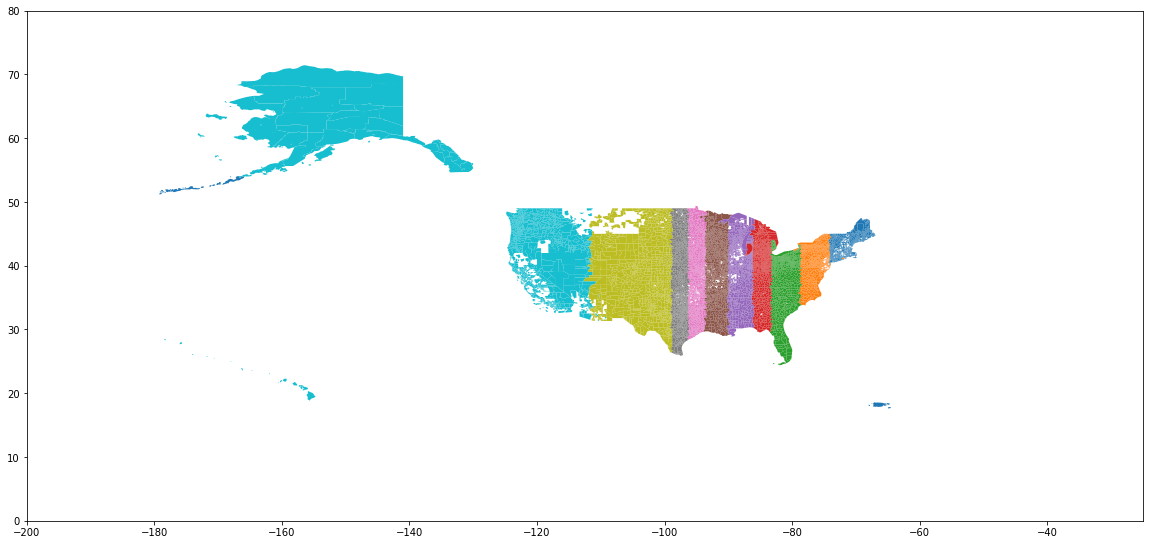

In [29]:
fig = map_data.plot(column='INTPTLON', figsize = (20,20))

plt.xlim([-200,-25])
plt.ylim([0,80])

plt.show()